# Day 1: Points

Visualise London as points at different



In [1]:
import os
import configparser

import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [2]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# geodata for shapefiles
config = configparser.ConfigParser()
config.read(config_file)
gdata_root = config["geodata"]["path"]

## Get data

In [3]:
# Read shapefile and reproject to coordinate system th
london_all = gpd.GeoDataFrame.from_file(os.path.join(gdata_root, "london-shapefiles\\London_Borough_Excluding_MHW.shp"))
_crs = "EPSG:32630"
london_all = london_all.to_crs(_crs)

#join london boroughs into gdf to work with
london = gpd.GeoDataFrame({'geometry': london_all.unary_union,'index':[0]}, crs=_crs)

# Get the extent of the shapefile
total_bounds = london.total_bounds

# Get minX, minY, maxX, maxY
minX, minY, maxX, maxY = total_bounds

In [142]:
square_sizes = [500,750, 1000,1500, 2000,2500, 3000, 3500, 4000,4500, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]
fishnets = []

for square_size in square_sizes:
    # Create a fishnet
    x, y = (minX, minY)
    geom_array = []

    while y <= maxY:
        while x <= maxX:
            geom = Polygon([(x,y), (x, y+square_size), (x+square_size, y+square_size), (x+square_size, y), (x, y)])
            geom_array.append(geom)
            x += square_size
        x = minX
        y += square_size

    fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs(_crs)

    #crop fishnet to london shapefile
    fishnet = gpd.sjoin(fishnet, london, how='inner').reset_index(drop=True)
    fishnet = fishnet.drop(columns=["index", "index_right"])
    
    fishnets.append(fishnet)

#add final rectangle for whole london
x, y = (minX, minY)
geom_array = []
geom_array.append(Polygon([(x,y), (x, maxY), (maxX, maxY), (maxX, y), (x, y)]))
fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs(_crs)
fishnets.append(fishnet)

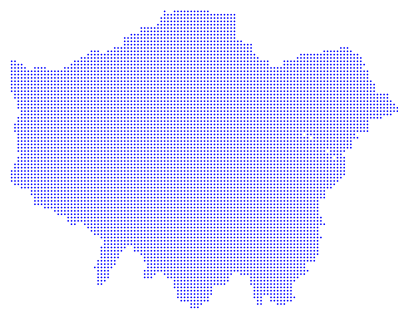

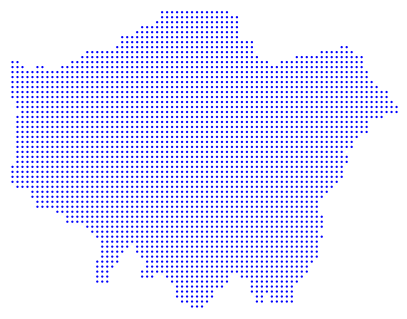

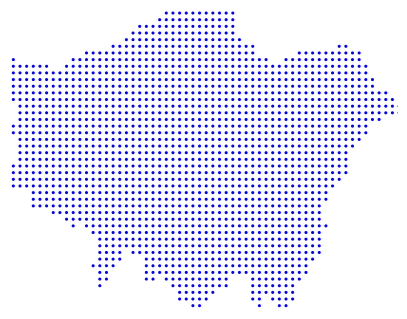

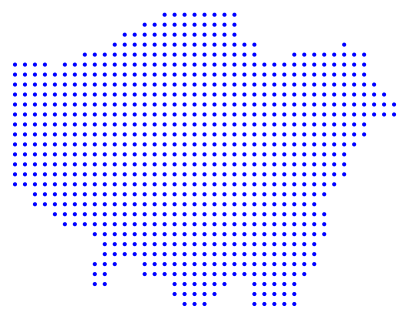

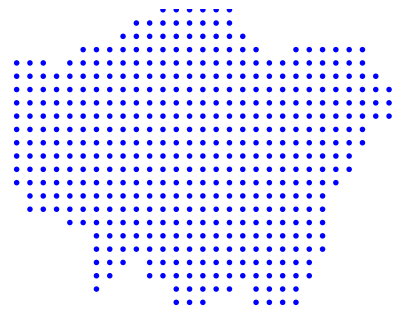

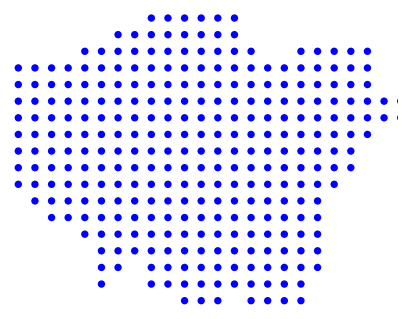

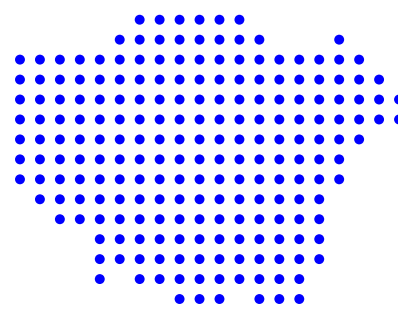

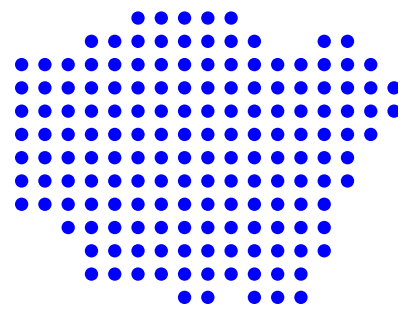

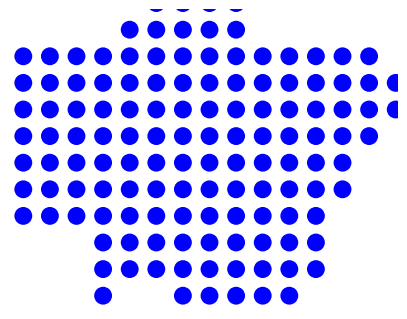

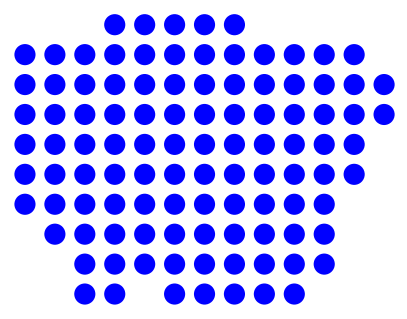

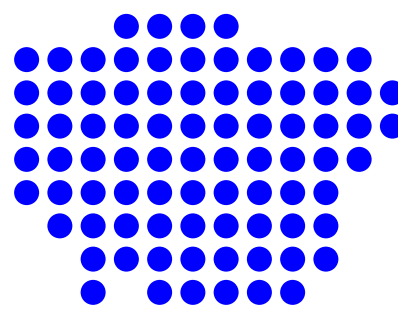

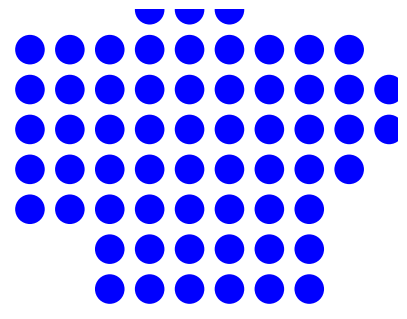

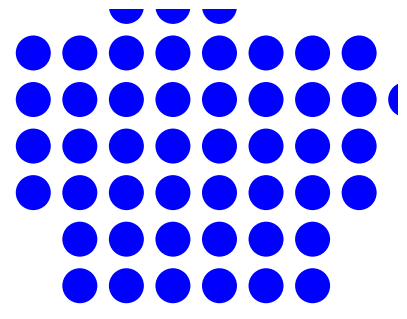

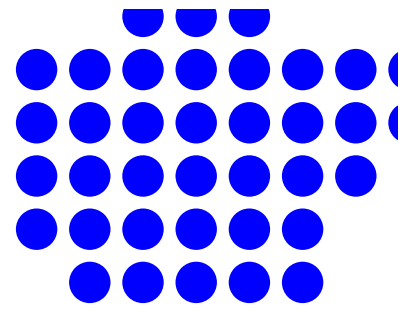

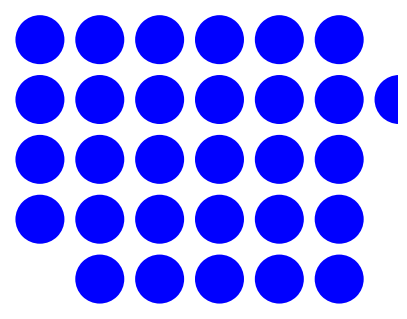

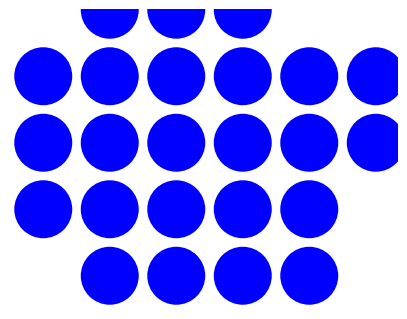

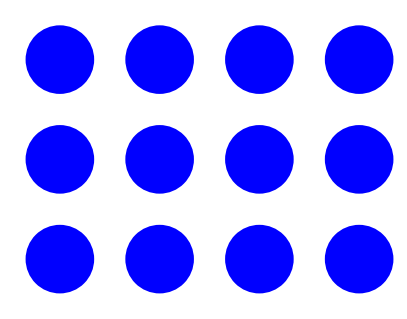

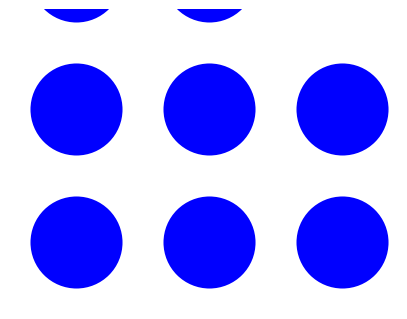

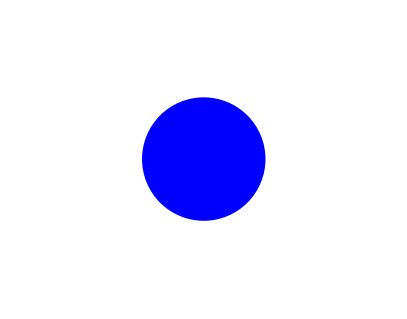

In [167]:
import numpy as np

base_size = 1.5
n = len(fishnets)
sizes = []
for i in range(n):
    if i <= 8:
        sizes.append(base_size * (1.8 ** i))  
    elif i <= n-3:
        sizes.append(sizes[-1] * 1.4)  
    elif i <= n-1:
        sizes.append(sizes[-1] * 1.8)  
    else:
        sizes.append(50000)  

for i, fishnet in enumerate(fishnets): 
    fig, ax = plt.subplots(figsize=(5,5))
    fishnet.centroid.plot(ax=ax, color="blue", edgecolor="none", markersize=sizes[i], clip_on=True, zorder=1)
    #london.plot(ax=ax, zorder=0)
    ax.set_xlim(xmin=minX, xmax=maxX)
    ax.set_ylim(ymin=minY, ymax=maxY)
    ax.axis("off")
    plt.show()


(5685642.325711634, 5730735.036137597)

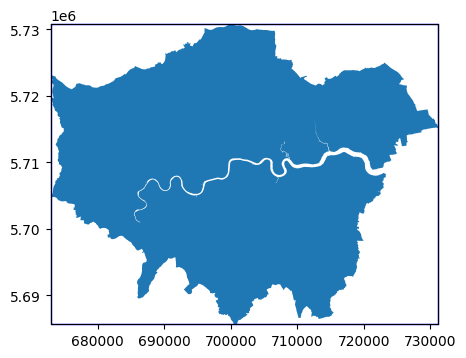

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
fishnets[-1].plot(ax=ax, color="none", edgecolor="blue", markersize=4, clip_on=False, zorder=1)
london.plot(ax=ax, zorder=0)
ax.set_xlim(xmin=minX, xmax=maxX)
ax.set_ylim(ymin=minY, ymax=maxY)
#ax.axis("off")

In [4]:
# Create a fishnet
x, y = (minX, minY)
geom_array = []

# Polygon Size (in meters)
square_size = 1000

while y <= maxY:
    while x <= maxX:
        geom = Polygon([(x,y), (x, y+square_size), (x+square_size, y+square_size), (x+square_size, y), (x, y)])
        geom_array.append(geom)
        x += square_size
    x = minX
    y += square_size
fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs(_crs)

#crop fishnet to london shapefile
fishnet = gpd.sjoin(fishnet, london, how='inner').reset_index(drop=True)
fishnet = fishnet.drop(columns=["index", "index_right"])

(670521.5265748396, 734321.5265748395, 5683892.325711634, 5733392.325711634)

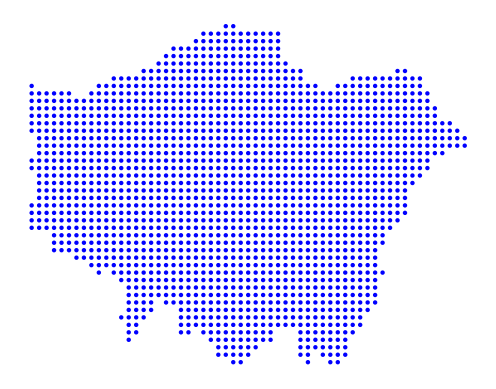

In [ ]:
ax = fishnet.centroid.plot(color="blue", edgecolor="none", markersize=10)
ax.axis("off")